# NAME : YADAV PRAJAKTA SUNIL 

# Project :
Solving Classification Predication For "weather_classification" Dataset using logistic Regression, Naives Bayes Classification,
Support Vector Classifier, K Nearest Neighbour, Desicion Tree Classifier, BaggingClassifier, VotingClassifier, StackingClassifier, BoostingClassifier

# Data

1.Temperature : present in positive and negative temperature                                                                  

2.Humidity : Humidity is the concentration of water vapor present in the air.

3.Wind Speed : Air moving from high to low pressure,due to change in temperature

4.Precipitation (%) :i.e rain

5.Cloud Cover :'partly cloudy' 'clear' 'overcast' 'cloudy'

6.Atmospheric Pressure : air pressure on earth

7.UV Index : ultra violet index

8.Season :'Winter', 'Spring', 'Summer','Autumn'

9.Visibility (km) :

10.Location	:'inland','mountain','coastal'

11.Weather Type :'Rainy','Cloudy','Sunny','Snowy


# Approach

1.Load the required libraries such as pandas,numpy,seaborn,matplotlib along with given dataset.

2.Perform EDA on given dataset.

3.Explore about the numerical variables like using libries seaborn and matplotlib

4.Explore about the categorical variables like using libries seaborn and matplotlib.

5.Finding relationship between features.

6.Finding out outliers in given data set using Boxplot

7.Cleaning data i.e raw data converted in useful data

8.Handling missing values like that mean,mode,median

9.Convert all required categorical columns to numerical columns like using a get dummies

10.Scaling down the data using a standarization or normalization.

11.Import machine learning Algoritham by using logistic Regression,Naives Bayes Classification, Support Vector Classifier, KNeighbourClassifier, Desicion Tree Classifier, BaggingClassifier, VotingClassifier, StackingClassifier, BoostingClassifier

12.Split the given dataset training data and testing data using a function train_test_split ,then calculate accuracy score using
  sklearn library by importing metrics.
  
13.Once we get accuracy score of all models for both training and testing data , create a dataframe and load all the accuracy of all models.

14.Once the dataset is created plot the accuracies of all the models using matplotlib for barplot.

15.They find out conclusion,which model gives best accuracy.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
X=pd.read_csv(r"C:\Users\HP\Downloads\data analysis\weather_classification_data.csv")
import warnings
warnings.filterwarnings("ignore")

In [2]:
X

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


In [3]:
X.info()                                                                                ## showing in columns in which datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [4]:
X.isnull().sum()                                                ## This will display the count of missing values for each column

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [5]:
for i in X.columns:                              ## This will display an array of unique values present in the specified column
    print(i)
    a = X[i].unique()
    print(a)

Temperature
[ 14.  39.  30.  38.  27.  32.  -2.   3.  28.  35.  12. -10.  24.  10.
  33.  43.  13.  -7.  26.   4.  17.  40.   2.  15.  29.  11.  -9.  36.
  42.  21.  22.  25.  -4.  -1.  -5.  41.  31.  16.  34.  49.  19.  23.
  20.  -3.  18.   1.   0.  46.  44. -13.  -6.  78.  63.  73.   8. -12.
 -24.  -8.  60.  48.   5.  51. -14.  50.  37.  54.  47.  70.   9.  66.
 -16. -15.  59.  80. -19.  52.  45.   6. -18. -11.  74.  76.  55. -20.
  57.  91.  82. -17.  61.   7.  53.  65.  77.  67.  64.  58.  68.  72.
  62.  71.  56. 107. -22.  75.  85.  97.  84. -21.  92. -25.  81. 109.
  98.  94.  90. -23.  88.  99.  69. 100.  89. 102.  86. 108.  87.  95.]
Humidity
[ 73  96  64  83  74  55  97  85  45  43  59  87  21  50  27  51  46 102
  67  88  36  79  72  57  61  70  95  69  90 105  49  37  22  54  66  25
  91  98  94  41  84  63  75  52  89  47  81  62  31  68  35  78  56  93
  44  38  24  82  65  80  39  48  60  29  99  92  76  77  86  32  58  42
  30 100  33  71 107 108  26 106  28 109 101  3

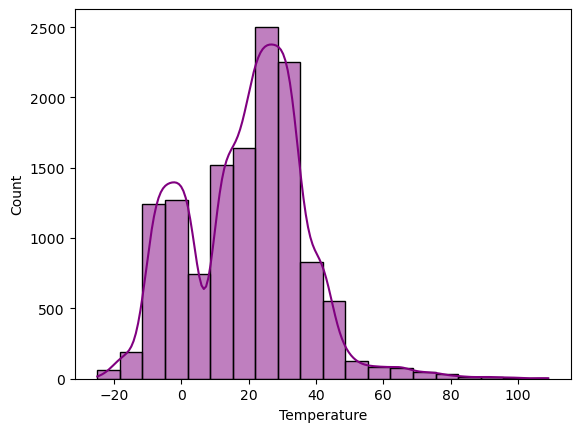

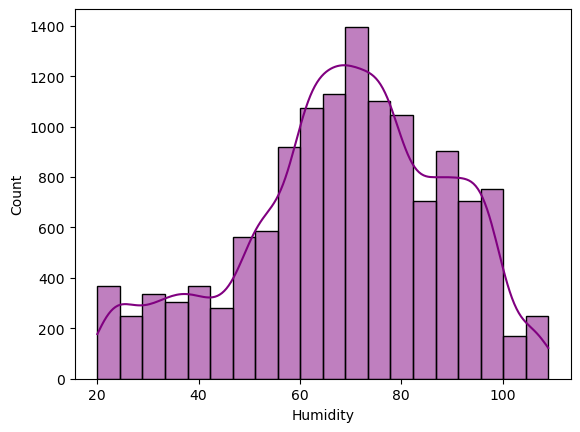

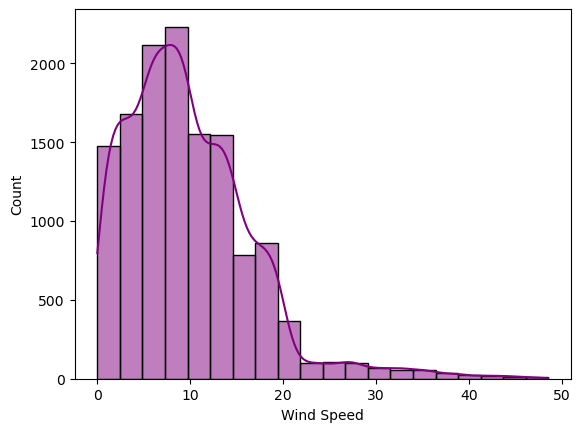

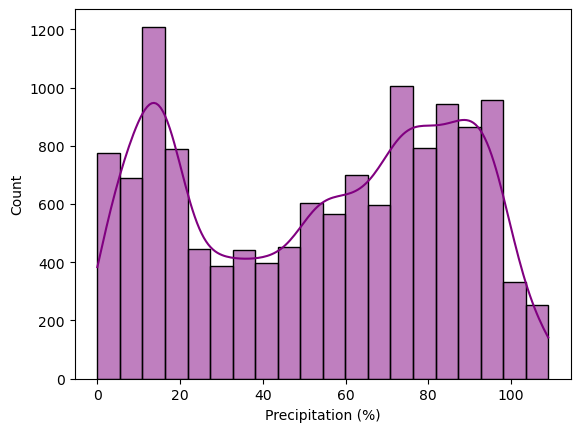

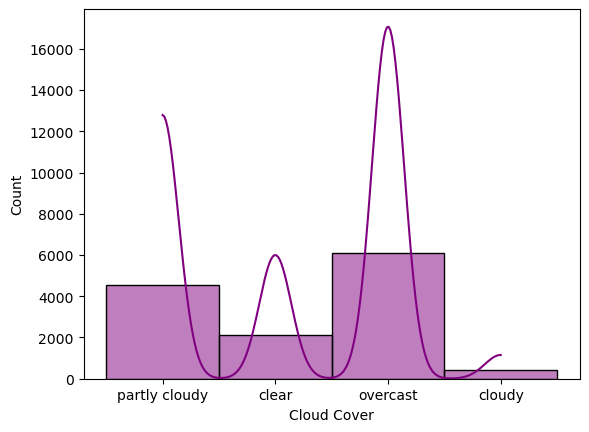

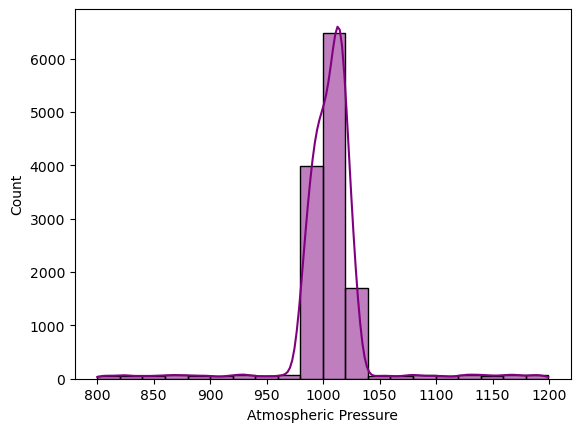

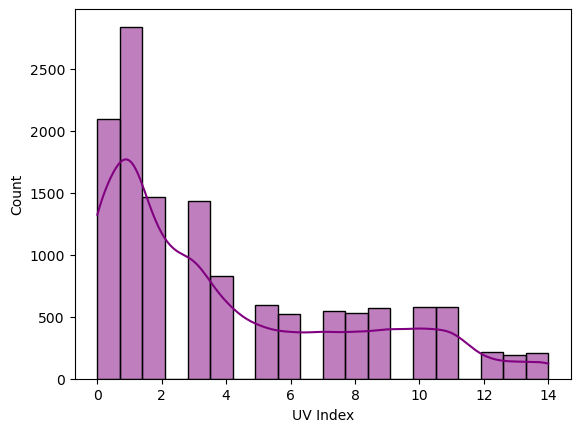

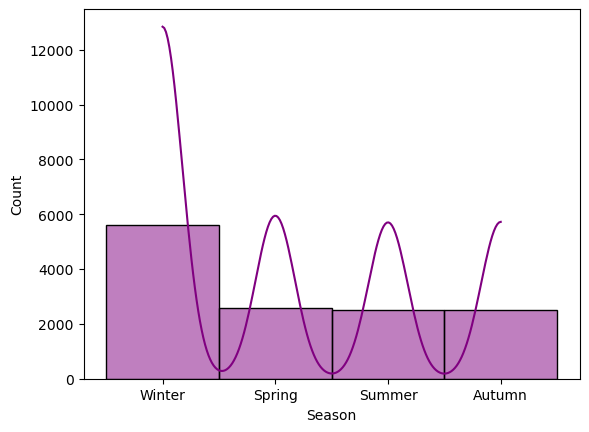

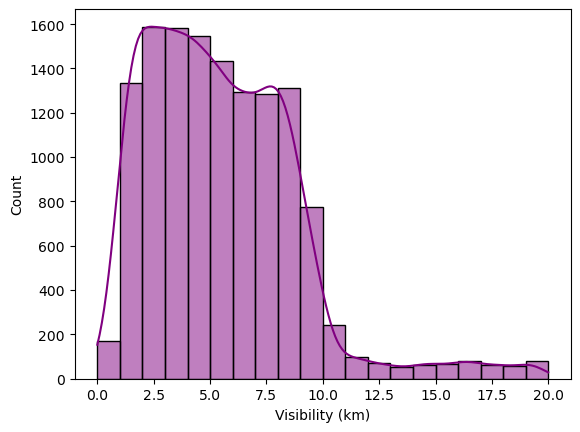

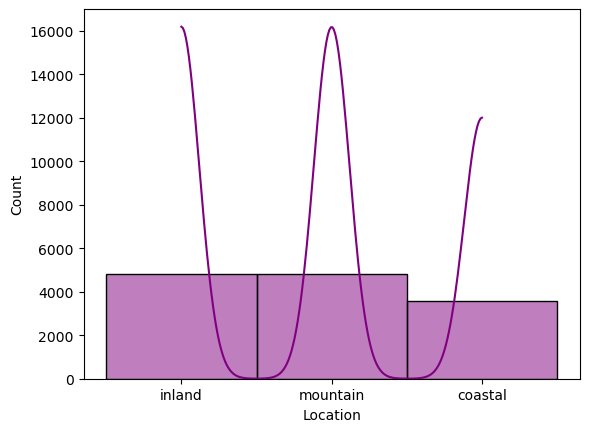

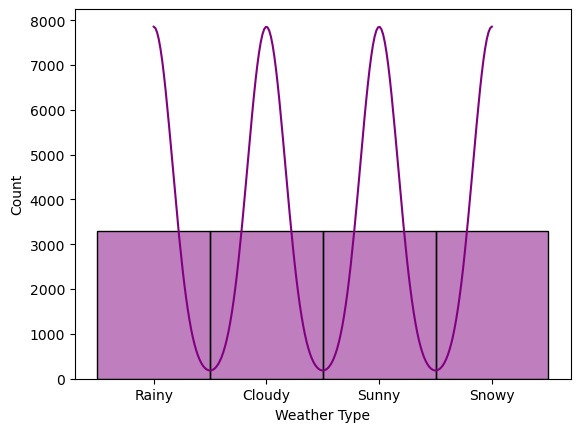

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in X.columns:
    sns.histplot(X[i],bins=20,kde=True,color="purple")                                       ## showing distribution of data set
    plt.show()

Temperature


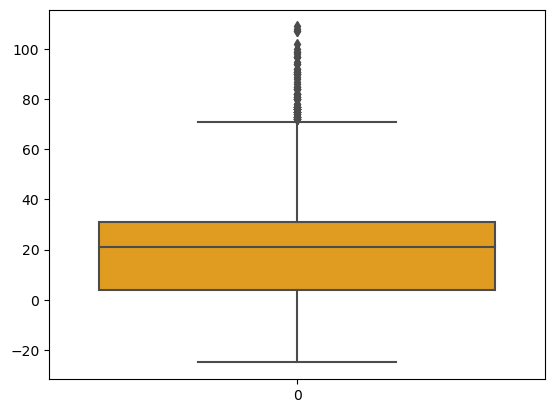

Humidity


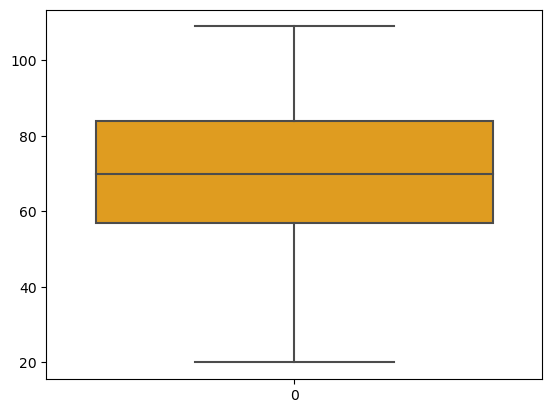

Wind Speed


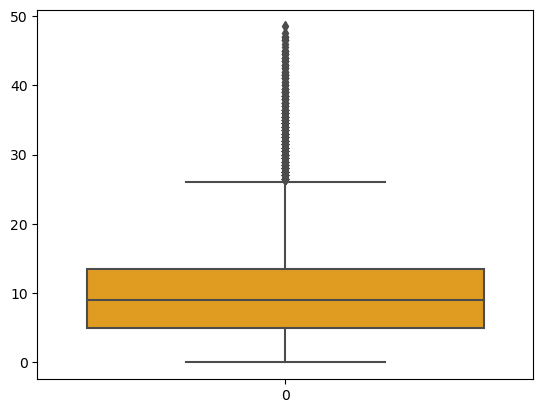

Precipitation (%)


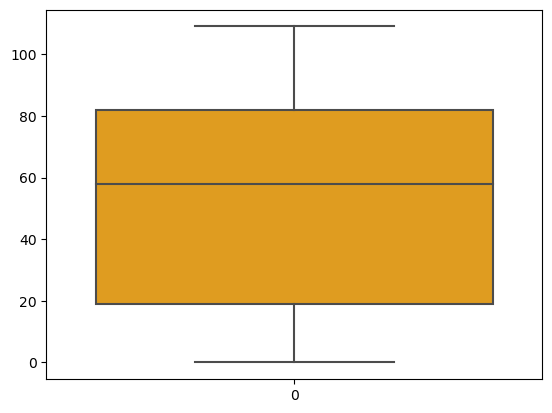

Atmospheric Pressure


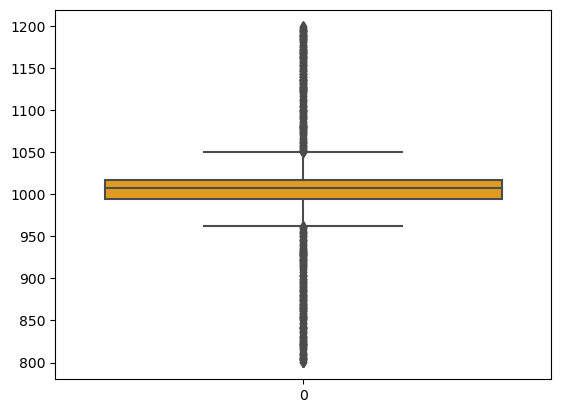

UV Index


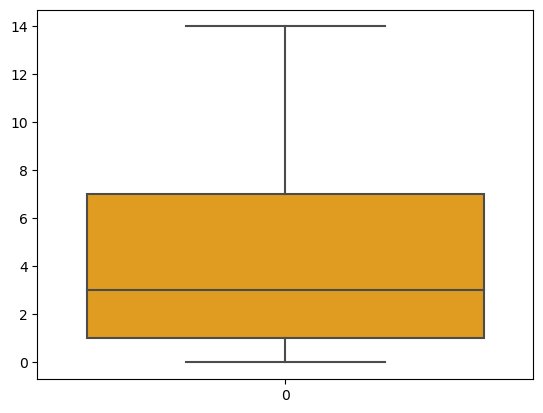

Visibility (km)


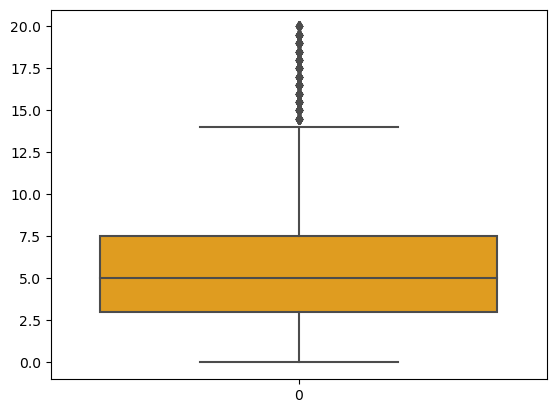

In [7]:
for i in X.columns:
     if(X[i].dtype=="int64") | (X[i].dtype=="float64"):
        print(i)
        sns.boxplot(X[i],color="orange")          ## display summary of dataset
        plt.show()

Temperature
Q1= 4.0
Q2= 21.0
Q3= 31.0
IQR= 27.0


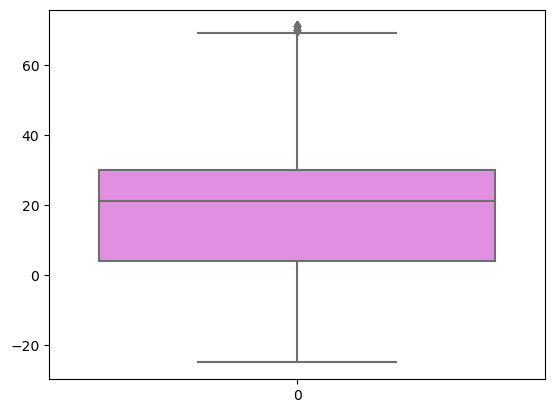

Humidity
Q1= 57.0
Q2= 70.0
Q3= 84.0
IQR= 27.0


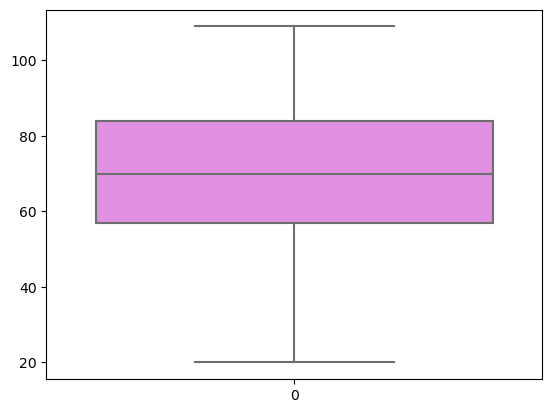

Wind Speed
Q1= 5.0
Q2= 9.0
Q3= 13.5
IQR= 8.5


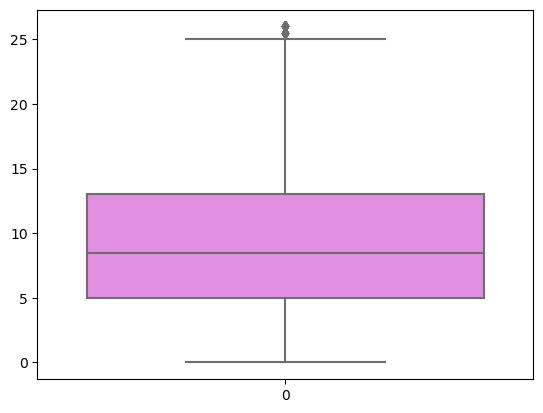

Precipitation (%)
Q1= 19.0
Q2= 58.0
Q3= 82.0
IQR= 63.0


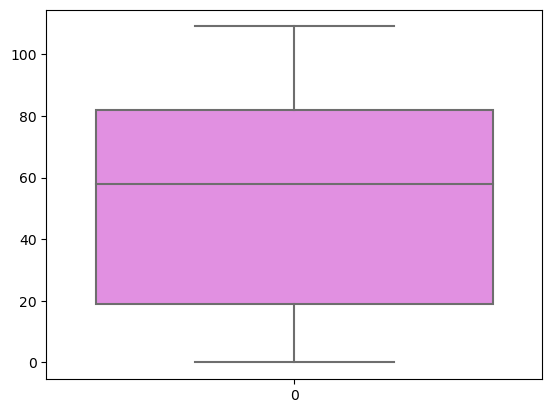

Atmospheric Pressure
Q1= 994.8
Q2= 1007.65
Q3= 1016.7725
IQR= 21.972500000000082


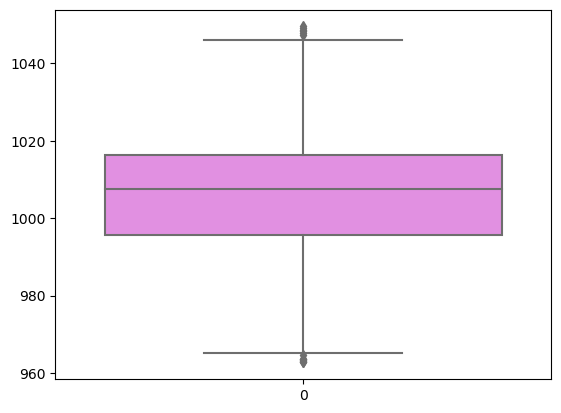

UV Index
Q1= 1.0
Q2= 3.0
Q3= 7.0
IQR= 6.0


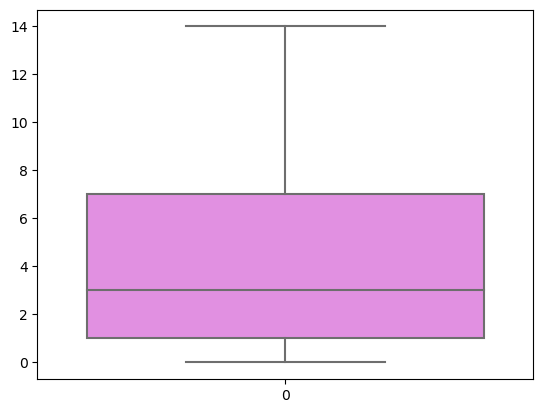

Visibility (km)
Q1= 3.0
Q2= 5.0
Q3= 7.5
IQR= 4.5


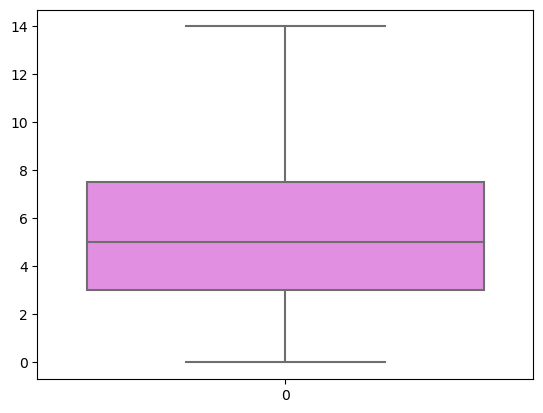

In [8]:
for i in X.columns:
    if(X[i].dtype=="int64") | (X[i].dtype=="float64"):
        print(i)
        Q1=X[i].quantile(0.25)
        print("Q1=",Q1)
        Q2=X[i].median() 
        print("Q2=",Q2)
        Q3=X[i].quantile(0.75)   
        print("Q3=",Q3)
        IQR=Q3-Q1
        print("IQR=",IQR)
        low_bound=Q1-(1.5*IQR)
        high_bound=Q3+(1.5*IQR)
        Z=X.loc[(X[i]>low_bound)&(X[i]<high_bound)]
        sns.boxplot(Z[i],color="violet")
        plt.show()       

In [9]:
#U=Z.sample(1000)

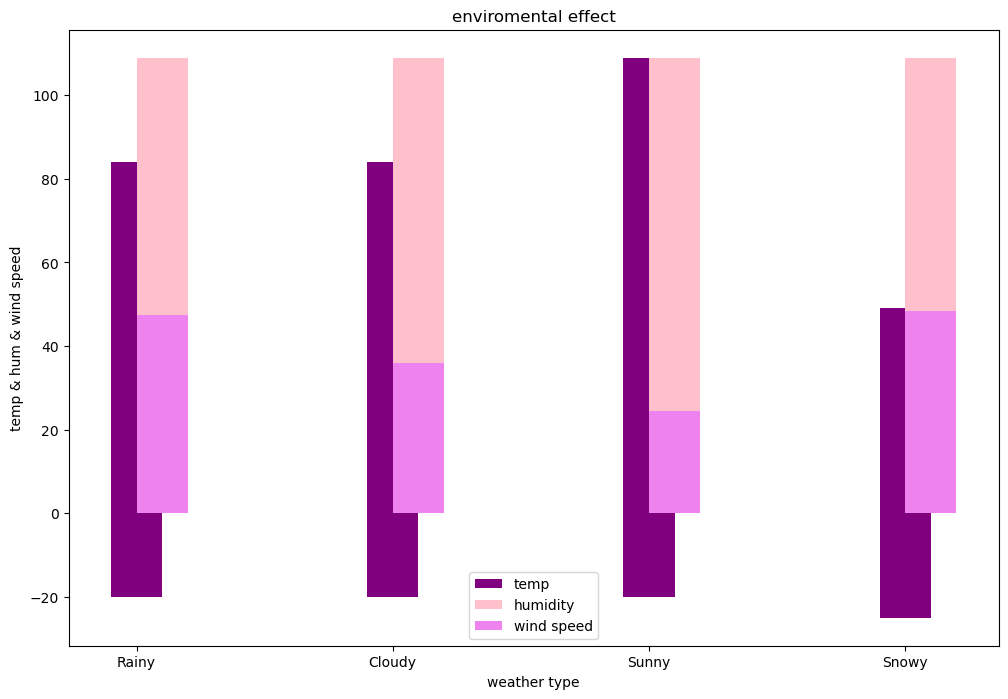

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.bar(Z["Weather Type"],Z['Temperature'], color="purple",label="temp",width=0.2,align="center")
plt.bar(Z["Weather Type"],Z['Humidity'], color="pink",label="humidity",width=0.2,align="edge")
plt.bar(Z["Weather Type"],Z['Wind Speed'], color="violet",label="wind speed",width=0.2,align="edge")
plt.xlabel("weather type")
plt.ylabel("temp & hum & wind speed")
plt.title("enviromental effect")
plt.legend()
plt.show()

In [11]:
X.describe()                                                          ## calculating some statistical summary for numerical data

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [12]:
X.corr()                                               ## statistical summary of the relationship between two sets of variables.

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
Temperature,1.000000,-0.207969,-0.070022,-0.287206,0.209188,0.374773,0.250751
Humidity,-0.207969,1.000000,0.406079,0.638631,-0.120653,-0.342694,-0.479969
Wind Speed,-0.070022,0.406079,1.000000,0.443770,-0.077757,-0.068147,-0.311828
Precipitation (%),-0.287206,0.638631,0.443770,1.000000,-0.177444,-0.291601,-0.457444
Atmospheric Pressure,0.209188,-0.120653,-0.077757,-0.177444,1.000000,0.154128,0.120182
UV Index,0.374773,-0.342694,-0.068147,-0.291601,0.154128,1.000000,0.362922
Visibility (km),0.250751,-0.479969,-0.311828,-0.457444,0.120182,0.362922,1.000000


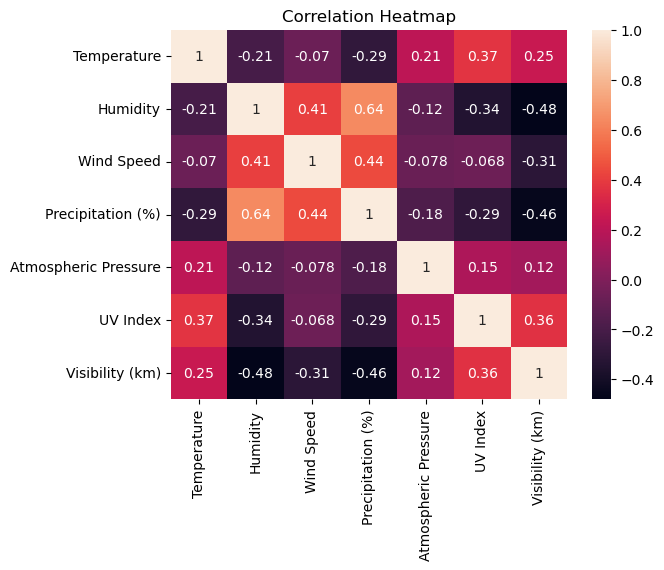

In [13]:
corr_matrix = X.corr()
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, annot=True) 
#values representing various shades
plt.title("Correlation Heatmap")
plt.show()

In [14]:
Z1=Z.groupby(["Season"])[["Atmospheric Pressure","Temperature","Humidity","Wind Speed","Precipitation (%)","UV Index","Visibility (km)"]].mean().reset_index().sort_values("Atmospheric Pressure",ascending=False)

In [15]:
Z1

,Season,Atmospheric Pressure,Temperature,Humidity,Wind Speed,Precipitation (%),UV Index,Visibility (km)
0,Autumn,1011.228190,26.239130,65.425585,9.644440,46.640050,4.670569,5.808319
1,Spring,1011.025288,26.190400,65.156800,9.197000,46.108800,4.705200,5.822400
2,Summer,1009.788920,26.467193,66.121678,9.635797,46.800249,4.766611,5.788414
3,Winter,999.513538,10.017763,74.187058,10.435110,62.953598,2.843756,4.205275


In [16]:
Z2=Z.groupby(["Weather Type"])[["Atmospheric Pressure","Temperature","Humidity","Wind Speed","Precipitation (%)","UV Index","Visibility (km)"]].mean().reset_index().sort_values("Atmospheric Pressure",ascending=False)

In [17]:
Z2

,Weather Type,Atmospheric Pressure,Temperature,Humidity,Wind Speed,Precipitation (%),UV Index,Visibility (km)
3,Sunny,1018.289377,33.000312,51.368142,6.033510,23.992207,7.810474,7.287562
0,Cloudy,1009.804812,23.059025,66.990991,8.633582,39.785648,3.476546,6.820286
1,Rainy,1004.486740,23.056268,79.326039,13.845264,75.446702,2.573929,3.208503
2,Snowy,990.824779,-2.070824,79.506111,11.092918,75.353808,1.761517,3.131150


In [18]:
Z3=Z.groupby(["Location"])[["Atmospheric Pressure","Temperature","Humidity","Wind Speed","Precipitation (%)","UV Index","Visibility (km)"]].mean().reset_index().sort_values("Atmospheric Pressure",ascending=False)

In [19]:
Z3

,Location,Atmospheric Pressure,Temperature,Humidity,Wind Speed,Precipitation (%),UV Index,Visibility (km)
0,coastal,1010.826830,26.145724,65.917394,9.576934,47.280105,4.618674,5.691390
1,inland,1004.494720,16.906070,70.802769,10.134931,56.123536,3.695421,4.881257
2,mountain,1003.625877,16.647737,70.208796,9.890371,55.678053,3.602263,4.932536


In [20]:
Z4=Z.groupby(["Cloud Cover"])[["Atmospheric Pressure","Temperature","Humidity","Wind Speed","Precipitation (%)","UV Index","Visibility (km)"]].mean().reset_index().sort_values("Atmospheric Pressure",ascending=False)

In [21]:
Z4

,Cloud Cover,Atmospheric Pressure,Temperature,Humidity,Wind Speed,Precipitation (%),UV Index,Visibility (km)
0,clear,1019.948109,34.293870,51.990173,5.930042,22.636874,7.871315,7.322649
3,partly cloudy,1007.848062,21.589668,68.166253,9.736522,49.379878,3.932326,5.595646
2,overcast,999.776205,12.476606,77.229415,11.550394,67.796579,2.312762,3.913886
1,cloudy,997.267183,13.556338,49.640845,7.485915,53.866197,7.246479,6.323944


In [22]:
X.shape                                                                                             ## showing rows and columns

(13200, 11)

In [23]:
Z.shape

(12817, 11)

In [24]:
M=pd.get_dummies(Z['Cloud Cover'],drop_first=True)

In [25]:
M

,cloudy,overcast,partly cloudy
0,0,0,1
1,0,0,1
2,0,0,0
3,0,0,0
4,0,1,0
...,...,...,...
13195,0,1,0
13196,1,0,0
13197,0,1,0
13198,0,1,0


In [26]:
F=pd.concat([Z,M],axis=1)
F

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,cloudy,overcast,partly cloudy
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy,0,0,1
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy,0,0,1
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny,0,0,0
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny,0,0,0
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy,0,1,0
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy,1,0,0
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy,0,1,0
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy,0,1,0


In [27]:
F.drop(columns='Cloud Cover',inplace=True)
F

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,cloudy,overcast,partly cloudy
0,14.0,73,9.5,82.0,1010.82,2,Winter,3.5,inland,Rainy,0,0,1
1,39.0,96,8.5,71.0,1011.43,7,Spring,10.0,inland,Cloudy,0,0,1
2,30.0,64,7.0,16.0,1018.72,5,Spring,5.5,mountain,Sunny,0,0,0
3,38.0,83,1.5,82.0,1026.25,7,Spring,1.0,coastal,Sunny,0,0,0
4,27.0,74,17.0,66.0,990.67,1,Winter,2.5,mountain,Rainy,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,1003.15,1,Summer,1.0,mountain,Rainy,0,1,0
13196,-1.0,76,3.5,23.0,1067.23,1,Winter,6.0,coastal,Snowy,1,0,0
13197,30.0,77,5.5,28.0,1012.69,3,Autumn,9.0,coastal,Cloudy,0,1,0
13198,3.0,76,10.0,94.0,984.27,0,Winter,2.0,inland,Snowy,0,1,0


In [28]:
Y=pd.get_dummies(F['Season'],drop_first=True)
Y

,Spring,Summer,Winter
0,0,0,1
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
13195,0,1,0
13196,0,0,1
13197,0,0,0
13198,0,0,1


In [29]:
T=pd.concat([F,Y],axis=1)
T

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,cloudy,overcast,partly cloudy,Spring,Summer,Winter
0,14.0,73,9.5,82.0,1010.82,2,Winter,3.5,inland,Rainy,0,0,1,0,0,1
1,39.0,96,8.5,71.0,1011.43,7,Spring,10.0,inland,Cloudy,0,0,1,1,0,0
2,30.0,64,7.0,16.0,1018.72,5,Spring,5.5,mountain,Sunny,0,0,0,1,0,0
3,38.0,83,1.5,82.0,1026.25,7,Spring,1.0,coastal,Sunny,0,0,0,1,0,0
4,27.0,74,17.0,66.0,990.67,1,Winter,2.5,mountain,Rainy,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,1003.15,1,Summer,1.0,mountain,Rainy,0,1,0,0,1,0
13196,-1.0,76,3.5,23.0,1067.23,1,Winter,6.0,coastal,Snowy,1,0,0,0,0,1
13197,30.0,77,5.5,28.0,1012.69,3,Autumn,9.0,coastal,Cloudy,0,1,0,0,0,0
13198,3.0,76,10.0,94.0,984.27,0,Winter,2.0,inland,Snowy,0,1,0,0,0,1


In [30]:
T.drop(columns='Season',inplace=True)
T

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Location,Weather Type,cloudy,overcast,partly cloudy,Spring,Summer,Winter
0,14.0,73,9.5,82.0,1010.82,2,3.5,inland,Rainy,0,0,1,0,0,1
1,39.0,96,8.5,71.0,1011.43,7,10.0,inland,Cloudy,0,0,1,1,0,0
2,30.0,64,7.0,16.0,1018.72,5,5.5,mountain,Sunny,0,0,0,1,0,0
3,38.0,83,1.5,82.0,1026.25,7,1.0,coastal,Sunny,0,0,0,1,0,0
4,27.0,74,17.0,66.0,990.67,1,2.5,mountain,Rainy,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,1003.15,1,1.0,mountain,Rainy,0,1,0,0,1,0
13196,-1.0,76,3.5,23.0,1067.23,1,6.0,coastal,Snowy,1,0,0,0,0,1
13197,30.0,77,5.5,28.0,1012.69,3,9.0,coastal,Cloudy,0,1,0,0,0,0
13198,3.0,76,10.0,94.0,984.27,0,2.0,inland,Snowy,0,1,0,0,0,1


In [31]:
T1=pd.get_dummies(T['Location'],drop_first=True)
T1

,inland,mountain
0,1,0
1,1,0
2,0,1
3,0,0
4,0,1
...,...,...
13195,0,1
13196,0,0
13197,0,0
13198,1,0


In [32]:
F1=pd.concat([T,T1],axis=1)
F1

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Location,Weather Type,cloudy,overcast,partly cloudy,Spring,Summer,Winter,inland,mountain
0,14.0,73,9.5,82.0,1010.82,2,3.5,inland,Rainy,0,0,1,0,0,1,1,0
1,39.0,96,8.5,71.0,1011.43,7,10.0,inland,Cloudy,0,0,1,1,0,0,1,0
2,30.0,64,7.0,16.0,1018.72,5,5.5,mountain,Sunny,0,0,0,1,0,0,0,1
3,38.0,83,1.5,82.0,1026.25,7,1.0,coastal,Sunny,0,0,0,1,0,0,0,0
4,27.0,74,17.0,66.0,990.67,1,2.5,mountain,Rainy,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,1003.15,1,1.0,mountain,Rainy,0,1,0,0,1,0,0,1
13196,-1.0,76,3.5,23.0,1067.23,1,6.0,coastal,Snowy,1,0,0,0,0,1,0,0
13197,30.0,77,5.5,28.0,1012.69,3,9.0,coastal,Cloudy,0,1,0,0,0,0,0,0
13198,3.0,76,10.0,94.0,984.27,0,2.0,inland,Snowy,0,1,0,0,0,1,1,0


In [33]:
F1.drop(columns='Location',inplace=True)

In [34]:
F1

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Weather Type,cloudy,overcast,partly cloudy,Spring,Summer,Winter,inland,mountain
0,14.0,73,9.5,82.0,1010.82,2,3.5,Rainy,0,0,1,0,0,1,1,0
1,39.0,96,8.5,71.0,1011.43,7,10.0,Cloudy,0,0,1,1,0,0,1,0
2,30.0,64,7.0,16.0,1018.72,5,5.5,Sunny,0,0,0,1,0,0,0,1
3,38.0,83,1.5,82.0,1026.25,7,1.0,Sunny,0,0,0,1,0,0,0,0
4,27.0,74,17.0,66.0,990.67,1,2.5,Rainy,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,1003.15,1,1.0,Rainy,0,1,0,0,1,0,0,1
13196,-1.0,76,3.5,23.0,1067.23,1,6.0,Snowy,1,0,0,0,0,1,0,0
13197,30.0,77,5.5,28.0,1012.69,3,9.0,Cloudy,0,1,0,0,0,0,0,0
13198,3.0,76,10.0,94.0,984.27,0,2.0,Snowy,0,1,0,0,0,1,1,0


In [35]:
F1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12817 entries, 0 to 13199
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           12817 non-null  float64
 1   Humidity              12817 non-null  int64  
 2   Wind Speed            12817 non-null  float64
 3   Precipitation (%)     12817 non-null  float64
 4   Atmospheric Pressure  12817 non-null  float64
 5   UV Index              12817 non-null  int64  
 6   Visibility (km)       12817 non-null  float64
 7   Weather Type          12817 non-null  object 
 8   cloudy                12817 non-null  uint8  
 9   overcast              12817 non-null  uint8  
 10  partly cloudy         12817 non-null  uint8  
 11  Spring                12817 non-null  uint8  
 12  Summer                12817 non-null  uint8  
 13  Winter                12817 non-null  uint8  
 14  inland                12817 non-null  uint8  
 15  mountain           

In [36]:
X["Weather Type"].unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

In [37]:
from sklearn.preprocessing import LabelEncoder
L=LabelEncoder()

In [38]:
F1["Weather Type"]=L.fit_transform(F1["Weather Type"])

In [39]:
F1

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Weather Type,cloudy,overcast,partly cloudy,Spring,Summer,Winter,inland,mountain
0,14.0,73,9.5,82.0,1010.82,2,3.5,1,0,0,1,0,0,1,1,0
1,39.0,96,8.5,71.0,1011.43,7,10.0,0,0,0,1,1,0,0,1,0
2,30.0,64,7.0,16.0,1018.72,5,5.5,3,0,0,0,1,0,0,0,1
3,38.0,83,1.5,82.0,1026.25,7,1.0,3,0,0,0,1,0,0,0,0
4,27.0,74,17.0,66.0,990.67,1,2.5,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,1003.15,1,1.0,1,0,1,0,0,1,0,0,1
13196,-1.0,76,3.5,23.0,1067.23,1,6.0,2,1,0,0,0,0,1,0,0
13197,30.0,77,5.5,28.0,1012.69,3,9.0,0,0,1,0,0,0,0,0,0
13198,3.0,76,10.0,94.0,984.27,0,2.0,2,0,1,0,0,0,1,1,0


In [40]:
F1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12817 entries, 0 to 13199
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           12817 non-null  float64
 1   Humidity              12817 non-null  int64  
 2   Wind Speed            12817 non-null  float64
 3   Precipitation (%)     12817 non-null  float64
 4   Atmospheric Pressure  12817 non-null  float64
 5   UV Index              12817 non-null  int64  
 6   Visibility (km)       12817 non-null  float64
 7   Weather Type          12817 non-null  int32  
 8   cloudy                12817 non-null  uint8  
 9   overcast              12817 non-null  uint8  
 10  partly cloudy         12817 non-null  uint8  
 11  Spring                12817 non-null  uint8  
 12  Summer                12817 non-null  uint8  
 13  Winter                12817 non-null  uint8  
 14  inland                12817 non-null  uint8  
 15  mountain           

In [41]:
F=F1.drop('Weather Type',axis=1)
T=F1['Weather Type']

In [43]:
from sklearn.preprocessing import StandardScaler
M=StandardScaler()

In [44]:
X_train[["Temperature","Humidity","Wind Speed","Precipitation (%)","Atmospheric Pressure"]]=M.fit_transform(X_train[["Temperature","Humidity","Wind Speed","Precipitation (%)","Atmospheric Pressure"]])
X_test[["Temperature","Humidity","Wind Speed","Precipitation (%)","Atmospheric Pressure"]]=M.transform(X_test[["Temperature","Humidity","Wind Speed","Precipitation (%)","Atmospheric Pressure"]])

# LogisticRegression

In [45]:
from sklearn.linear_model import LogisticRegression
L=LogisticRegression()

In [46]:
L.fit(X_train,y_train)

LogisticRegression()

In [47]:
L.score(X_train,y_train)

0.9034330824306958

In [48]:
L.score(X_test,y_test)

0.9022360894435777

# SVC

In [49]:
from sklearn.svm import SVC
s=SVC()

In [50]:
s.fit(X_train,y_train)

SVC()

In [51]:
s.score(X_train,y_train)

0.9316137323297228

In [52]:
s.score(X_test,y_test)

0.9230369214768591

# KNeighborsClassifier

In [53]:
from sklearn.neighbors import KNeighborsClassifier
K=KNeighborsClassifier()

In [54]:
K1=K.fit(X_train,y_train)
K1

KNeighborsClassifier()

In [55]:
K1.score(X_train,y_train)

0.9333578116394345

In [56]:
K1.score(X_test,y_test)

0.9089963598543942

# naive_bayes

In [57]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB,ComplementNB
G=GaussianNB()
M=MultinomialNB()
B=BernoulliNB()
C=ComplementNB()

In [58]:
G.fit(X_train,y_train)

GaussianNB()

In [59]:
G.score(X_train,y_train)

0.8632274646594456

In [60]:
G.score(X_test,y_test)

0.8653146125845034

In [61]:
B.fit(X_train,y_train)

BernoulliNB()

In [62]:
B.score(X_train,y_train)

0.8249495134936662

In [63]:
B.score(X_test,y_test)

0.827873114924597

In [64]:
from sklearn.tree import DecisionTreeClassifier
D=DecisionTreeClassifier(max_depth=5,criterion='gini',min_samples_split=8)

In [65]:
D.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=8)

In [66]:
D.score(X_train,y_train)

0.924362034147237

In [67]:
D.score(X_test,y_test)

0.9152366094643786

# DecisionTreeClassifier

In [68]:
from sklearn.tree import DecisionTreeClassifier
D=DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
params={"max_depth":[5,6,8,9],"criterion":['gini'],"min_samples_split":[6,9,8,6]}
G1=GridSearchCV(D,param_grid=params,scoring="accuracy",cv=7)

In [69]:
G1.fit(X_train,y_train)

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [5, 6, 8, 9],
                         'min_samples_split': [6, 9, 8, 6]},
             scoring='accuracy')

In [70]:
G1.best_params_

{'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 6}

In [71]:
G1.score(X_train,y_train)

0.9622728107214981

In [72]:
G1.score(X_test,y_test)

0.9329173166926678

In [73]:
from sklearn.tree import DecisionTreeClassifier
D=DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
params={"max_depth":[5,6,8,9],"criterion":['entropy'],"min_samples_split":[6,9,8,6]}
G1=GridSearchCV(D,param_grid=params,scoring="accuracy",cv=7)

In [74]:
G1.fit(X_train,y_train)

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [5, 6, 8, 9],
                         'min_samples_split': [6, 9, 8, 6]},
             scoring='accuracy')

In [75]:
G1.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 6}

In [76]:
G1.score(X_train,y_train)

0.9634661281439324

In [77]:
G1.score(X_test,y_test)

0.9349973998959958

# BaggingClassifier,RandomForestClassifier

In [78]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
A=RandomForestClassifier(n_estimators=20)

In [79]:
A.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [80]:
A.score(X_train,y_train)

0.9998164127042408

In [81]:
A.score(X_test,y_test)

0.9386375455018201

# BaggingClassifier

In [82]:
from sklearn.ensemble import BaggingClassifier
B=BaggingClassifier(estimator=KNeighborsClassifier(),n_estimators=60)

In [83]:
B.fit(X_train,y_train)

BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=60)

In [84]:
B.score(X_train,y_train)

0.9365705893152194

In [85]:
B.score(X_test,y_test)

0.9131565262610505

# VotingClassifier

In [86]:
from sklearn.ensemble import VotingClassifier
A=VotingClassifier(estimators=[("logi",LogisticRegression()),("nb",GaussianNB()),("svc",SVC())])

In [87]:
A.fit(X_train,y_train)

VotingClassifier(estimators=[('logi', LogisticRegression()),
                             ('nb', GaussianNB()), ('svc', SVC())])

In [88]:
A.score(X_train,y_train)

0.9137139709932073

In [89]:
A.score(X_test,y_test)

0.9105564222568903

# StackingClassifier

In [90]:
from sklearn.ensemble import StackingClassifier
s=StackingClassifier(estimators=[("nb",GaussianNB()),("svc",SVC()),("knn",KNeighborsClassifier())],final_estimator=LogisticRegression())


In [91]:
s.fit(X_train,y_train)

StackingClassifier(estimators=[('nb', GaussianNB()), ('svc', SVC()),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

In [92]:
s.score(X_train,y_train)

0.9358362401321828

In [93]:
s.score(X_test,y_test)

0.9157566302652106

# AdaBoostClassifier

In [94]:
from sklearn.ensemble import AdaBoostClassifier
A=AdaBoostClassifier(n_estimators=50)

In [95]:
A.fit(X_train,y_train)

AdaBoostClassifier()

In [96]:
A.score(X_train,y_train)

0.8817697815311181

In [97]:
A.score(X_test,y_test)

0.8928757150286012

In [100]:
A={"Methods":["Logistic","Svc","knn","Gaussian","bernoulli","DecisionTree","BaggingClassifier","VotingClassifier","StackingClassifier","AdaBoostClassifier"],"Train":[90,93,93,86,82,96,93,91,93,88],"Test":[90,92,90,86,82,93,91,91,91,89]}

In [101]:
A=pd.DataFrame(A)

In [102]:
A

,Methods,Train,Test
0,Logistic,90,90
1,Svc,93,92
2,knn,93,90
3,Gaussian,86,86
4,bernoulli,82,82
5,DecisionTree,96,93
6,BaggingClassifier,93,91
7,VotingClassifier,91,91
8,StackingClassifier,93,91
9,AdaBoostClassifier,88,89


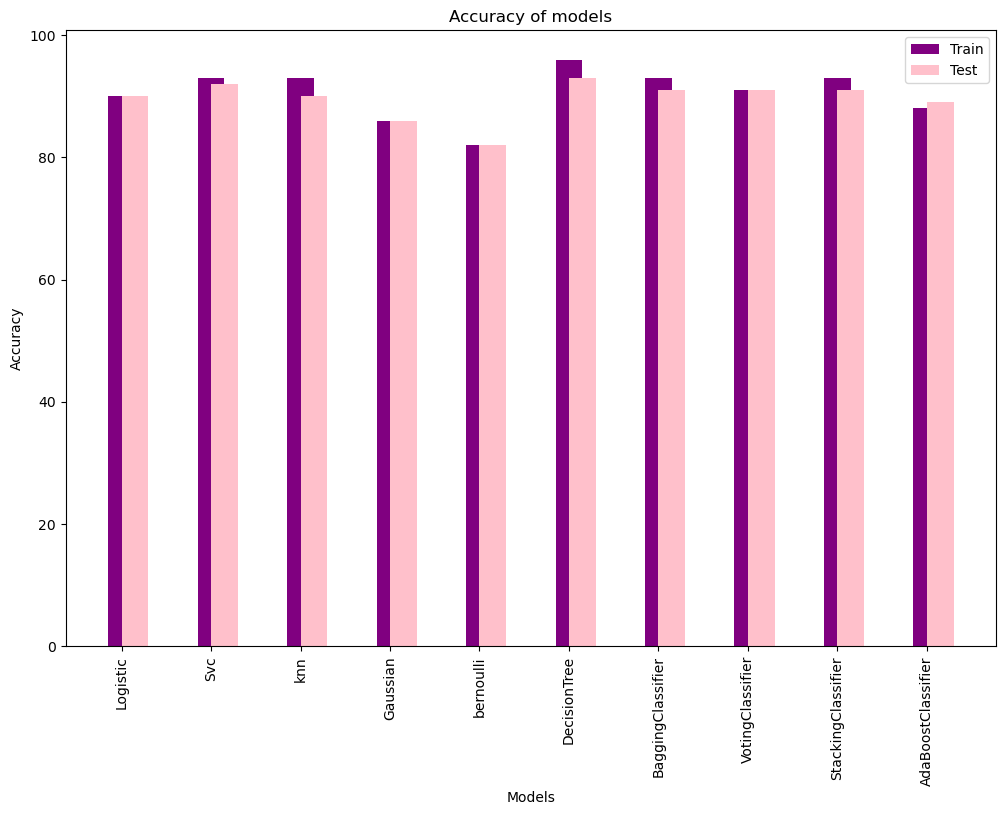

In [110]:
plt.figure(figsize=(12,8))
plt.bar(A["Methods"],A["Train"],width=0.3,label="Train",color="purple")
plt.bar(A["Methods"],A["Test"],align="edge",width=0.3,label="Test",color="pink")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=[1,0,0,1])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of models")
plt.show()

#  On basis of this chart assume that DecisionTree model working is fine as comapred to other.